**Import Library**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Deep Learning /CampusX/Customer Churn Prediction using ANN/Churn_Modelling.csv')

In [3]:
#get familier with dataset, display the top 5 data records
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# getting to know about rows and columns we're dealing with - 10000 rows , 14 columns
df.shape

(10000, 14)

In [5]:
# learning about the columns
df.columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# knowledge of data type helps for computation
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
#  Print a concise summary of a DataFrame. 
#  This method prints information about a DataFrame including the index dtype and columns,
#  non-null values and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# check duplicate values 
df.duplicated().sum()

0

In [9]:
# helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features.

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


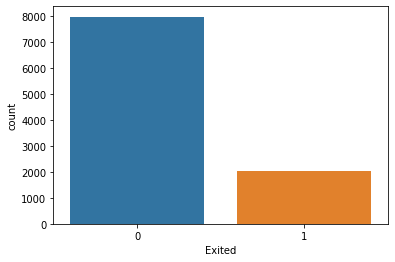

In [10]:
# df['Exited'].value_counts()
sns.countplot('Exited',data=df)
plt.show()

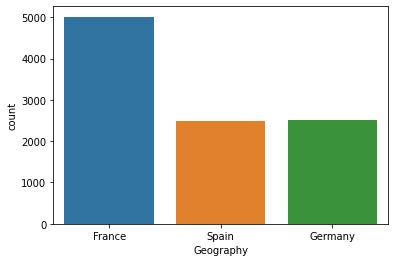

In [11]:
sns.countplot('Geography',data=df)
plt.show()

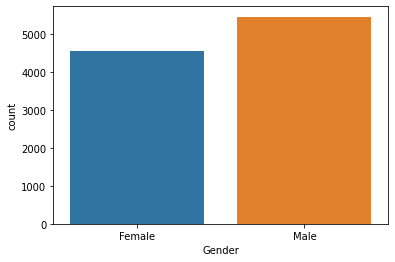

In [12]:
sns.countplot('Gender',data=df)
plt.show()

In [13]:
# Drop the unnecessary values 
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# catagorical columns convert 

df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [18]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [19]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [20]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
X_train.shape,y_train.shape

((8000, 11), (8000,))

In [22]:
X_test.shape,y_test.shape

((2000, 11), (2000,))

In [23]:
# Scalling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [25]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [26]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python import metrics

In [27]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [29]:
# model complie 
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) 

In [30]:
 # model train/run
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 7ms/step - loss: 0.5020 - accuracy: 0.8011 - val_loss: 0.4549 - val_accuracy: 0.8150
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.8172 - val_loss: 0.4289 - val_accuracy: 0.8156
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4243 - accuracy: 0.8238 - val_loss: 0.4172 - val_accuracy: 0.8213
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4127 - accuracy: 0.8277 - val_loss: 0.4077 - val_accuracy: 0.8238
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4030 - accuracy: 0.8334 - val_loss: 0.3995 - val_accuracy: 0.8325
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3936 - accuracy: 0.8369 - val_loss: 0.3898 - val_accuracy: 0.8350
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3825 - accuracy: 0.8434 - val_loss: 0.3796 - val_accuracy: 0.8431

In [31]:
model.layers[0].get_weights() # model calculate 

[array([[-0.01999228, -0.07814182, -0.00375067, -0.11466996,  0.28665924,
          0.1028105 , -0.05424688, -0.19771394, -0.17578737, -0.3800541 ,
          0.134509  ],
        [ 1.1106628 ,  1.1725243 , -0.99094254, -0.20505168, -0.06057278,
          0.32961848,  0.3444628 ,  0.40175766, -1.042349  , -0.57846415,
          0.12890084],
        [ 0.02864338, -0.03506393, -0.20985763, -0.00300274, -0.14175503,
         -0.04715187, -0.12177675, -0.24856286,  0.22385663,  0.03552383,
          0.31702715],
        [ 0.16427848, -0.2972313 ,  0.11572622,  0.49709332, -0.24432532,
          0.6270449 , -0.16805674, -0.23607877, -0.0816571 , -0.28592986,
         -0.6377064 ],
        [ 0.02996195, -0.6333655 , -0.00220092, -0.5917336 ,  0.03598841,
          1.0148103 , -0.77423626,  1.0541201 ,  0.15081705,  0.9681217 ,
          0.06252835],
        [ 0.37981677, -0.21261388,  0.07510915, -0.33009216,  0.42997822,
         -0.08532763,  0.37229702,  0.28560016, -0.5375655 , -0.1345339

In [32]:
model.predict(X_test_scaled) # predict the model / dataset

array([[0.07276037],
       [0.08091328],
       [0.02999857],
       ...,
       [0.01690406],
       [0.03008664],
       [0.34041843]], dtype=float32)

In [33]:
y_log = model.predict(X_test_scaled) # predict model store variable

In [34]:
# y_log 0.5+ (1) customer leave the bank and 0.5-(0) customer stay the bank 
# and store a variable

# np.where(y_log > 0.5,1,0)

y_pred = np.where(y_log > 0.5,1,0)

In [35]:
# accuracy of the prediction 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)       

0.8625

In [36]:
# using confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix_1 = confusion_matrix(y_test,y_pred)
c_matrix_1

array([[1531,   54],
       [ 221,  194]])

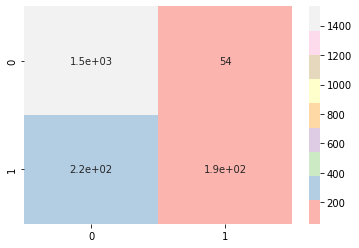

In [37]:
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='Pastel1',annot=True)
plt.show()

In [38]:
# history.history 

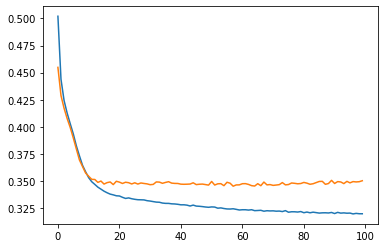

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

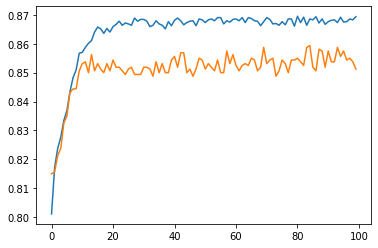

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()